In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END

In [3]:
class AgentState(TypedDict):
    n1: int
    n2: int
    n3: int
    n4: int
    op1: str
    op2: str
    result1: int
    result2: int

In [5]:
def add_node(state:AgentState) -> AgentState:
    state['result1'] = state['n1'] + state['n2']
    return state

def sub_node(state:AgentState) -> AgentState:
    state['result1'] = state['n1'] - state['n2']
    return state

def add_node2(state:AgentState) -> AgentState:
    state['result2'] = state['n3'] + state['n4']
    return state

def sub_node2(state:AgentState) -> AgentState:
    state['result2'] = state['n3'] - state['n4']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    if state['op1'] == '+':
        return "add_operation"
    elif state['op1'] == '-':
        return "sub_operation"
    

def decide_next_node2(state:AgentState) -> AgentState:
    if state['op2'] == '+':
        return "add_operation2"
    elif state['op2'] == '-':
        return "sub_operation2"

In [ ]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("add_node",add_node)
graph_builder.add_node("sub_node",sub_node)
graph_builder.add_node("router",lambda state:state)

graph_builder.add_node("add_node2",add_node2)
graph_builder.add_node("sub_node2",sub_node2)
graph_builder.add_node("router2",lambda state:state)


graph_builder.add_edge(START,"router")

graph_builder.add_conditional_edges(
    "router", # source
    decide_next_node,
    {
        "add_operation": "add_node",
        "sub_operation": "sub_node"
    }
)

graph_builder.add_edge("add_node","router2")
graph_builder.add_edge("sub_node","router2")

graph_builder.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "add_operation2": "add_node2",
        "sub_operation2": "sub_node2"
    }
)

graph_builder.add_edge("add_node2",END)
graph_builder.add_edge("sub_node2",END)

app = graph_builder.compile()

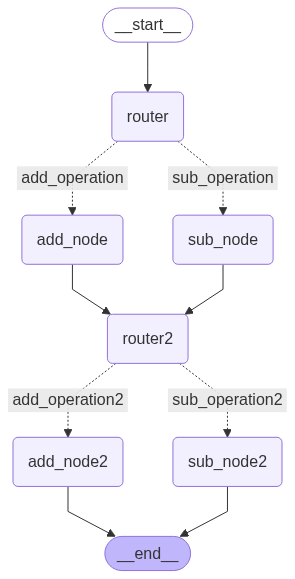

In [14]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result = app.invoke({
    'n1': 10,
    'n2': 5,
    'n3': 9,
    'n4': 8,
    'op1': '+',
    'op2': '-'
})

In [19]:
result

{'n1': 10,
 'n2': 5,
 'n3': 9,
 'n4': 8,
 'op1': '+',
 'op2': '-',
 'result1': 15,
 'result2': 1}

In [20]:
result['result1']

15

In [21]:
result['result2']


1